In [1]:
import warnings
warnings.filterwarnings("ignore")

## Import basic required packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import data
## Structured Data

In [3]:
#Importing Data from .CSV Files - user_rating
user_rating = pd.read_csv("Data/user_rating.csv")
user_rating.head()

,userID,placeID,food_rating,service_rating
0,U1077,135085,2,2
1,U1077,135038,2,1
2,U1077,132825,2,2
3,U1077,135060,2,2
4,U1068,135104,1,2


In [4]:
#Importing Data from Spread Sheets - consumer_survey
consumer_survey = pd.read_excel("Data/consumer_survey.xlsx")
consumer_survey.head()

,gender,smoker,drink_level,dress_preference,ambience,transport,marital_status,interest,personality,religion,activity,income,FRVPM,AERPM
0,male,False,abstemious,informal,family,on foot,single,variety,thrifty-protector,none,student,medium,12,2976
1,female,False,abstemious,informal,family,public,single,technology,hunter-ostentatious,Catholic,student,low,12,3648
2,female,False,social drinker,formal,family,public,single,none,hard-worker,Catholic,student,low,3,1461
3,male,False,abstemious,informal,family,public,single,variety,hard-worker,none,professional,medium,18,4014
4,female,False,abstemious,no preference,family,public,single,none,thrifty-protector,Catholic,student,medium,15,3045


In [5]:
#Importing Data from Spread Sheets - restaurant_parking
restaurant_parking = pd.read_excel("Data/restaurant_parking.xlsx")
restaurant_parking.head()

,placeID,parking_lot
0,135111,public
1,135110,none
2,135109,none
3,135108,none
4,135107,none


In [6]:
#Importing Data from Spread Sheets - dining_preferences
dining_preferences = pd.read_excel("Data/dining_preferences.xlsx")
dining_preferences.head()

,Year,Dine_In,Home_Delivery
0,1990,5649,0
1,1991,5539,0
2,1992,5760,104
3,1993,6509,76
4,1994,6982,156


In [7]:
#Importing Data from Spread Sheets - restaurant cuisine
restaurant_cuisine = pd.read_excel("Data/restaurant_cuisine.xlsx")
restaurant_cuisine.head()

,placeID,Rcuisine
0,132001,Dutch-Belgian
1,132002,Seafood
2,132003,International
3,132004,Seafood
4,132005,French


#### Optional code for MS Access Database
#### Connecting and Fetching Data from MS Access Database - cuisine table
import pyodbc

conn_str = (r'Driver={Microsoft Access Driver (*.mdb, *.accdb)};DBQ=Data/restaurant_cuisine.accdb;')

conn = pyodbc.connect(conn_str)

cuisine = pd.read_sql('select * from cuisine', conn)

conn.close()

cuisine.head()

In [8]:
# SQLite can be used as an open source data base framework
# Incase sqlite3 is not installed, uncomment the line below, run it and restart the kernel
# !pip install db-sqlite3

In [9]:
#Importing Data from SQL database - restaurant_details table
import sqlite3
conn = sqlite3.connect('r_details.db')
c = conn.cursor()

# creating table
c.execute('''create table restaurant_details
(placeID number CONSTRAINT pk_p_p1 PRIMARY KEY, name varchar2(50),
address varchar2(60), state varchar2(20),
country varchar2(20), zip varchar2(20), alcohol varchar2(30),
smoking_area varchar2(20), price varchar2(20),area varchar2(20),
other_services varchar2(20), Region varchar2(10),
Average_dine_in_per_month number);
''')

In [10]:
# populating values in the table
c.executescript("""
    insert into restaurant_details values (134999,' Kiku Cuernavaca ',' Revolucion ',' Morelos ',' Mexico ','  ',' No_Alcohol_Served ',' none ',' medium ',' closed ',' none ',' West ',677);
insert into restaurant_details values (132825,' puesto de tacos ',' esquina santos degollado y leon guzman ',' s.l.p. ',' mexico ',' 78280 ',' No_Alcohol_Served ',' none ',' low ',' open ',' none ',' West ',561);
insert into restaurant_details values (135106,' El Rincon de San Francisco ',' Universidad 169 ',' San Luis Potosi ',' Mexico ',' 78000 ',' Wine-Beer ',' only at bar ',' medium ',' open ',' none ',' East ',743);
insert into restaurant_details values (132667,' little pizza Emilio Portes Gil ',' calle emilio portes gil ',' tamaulipas ',' NA ','  ',' No_Alcohol_Served ',' none ',' low ',' closed ',' none ',' East ',546);
insert into restaurant_details values (132613,' carnitas_mata ',' lic. Emilio portes gil ',' Tamaulipas ',' Mexico ','  ',' No_Alcohol_Served ',' permitted ',' medium ',' closed ',' none ',' East ',697);
insert into restaurant_details values (135040,' Restaurant los Compadres ',' Camino a Simon Diaz 155 Centro ',' SLP ',' Mexico ',' 74000 ',' Wine-Beer ',' none ',' high ',' closed ',' none ',' West ',888);
insert into restaurant_details values (132732,' Taqueria EL amigo  ',' Calle Mezquite Fracc Framboyanes ',' Tamaulipas ',' Mexico ',' 87018 ',' No_Alcohol_Served ',' none ',' low ',' open ',' none ',' West ',735);
insert into restaurant_details values (132875,' shi ro ie ','  ','  ','  ','  ',' Wine-Beer ',' section ',' high ',' open ',' Internet ',' West ',980);
insert into restaurant_details values (132609,' Pollo_Frito_Buenos_Aires ',' tampico ',' Tamaulipas ',' Mexico ','  ',' No_Alcohol_Served ',' not permitted ',' low ',' closed ',' none ',' East ',728);
insert into restaurant_details values (135082,' la Estrella de Dimas ',' Villa de Pozos 192 Villa de Pozos ',' SLP ',' Mexico ',' 78421 ',' No_Alcohol_Served ',' none ',' medium ',' closed ',' none ',' East ',600);
insert into restaurant_details values (135070,' Restaurante 75 ',' Villa de Pozos 4497 Villa de Pozos ',' SLP ',' Mexico ',' 78421 ',' No_Alcohol_Served ',' none ',' medium ',' closed ',' none ',' East ',415);
insert into restaurant_details values (135069,' Abondance Restaurante Bar ',' Industrias 908 Valle Dorado ',' SLP ',' Mexico ',' 78399 ',' Wine-Beer ',' none ',' low ',' closed ',' none ',' East ',606);
insert into restaurant_details values (135065,' El angel Restaurante ',' Venustiano Carranza 1625 Jardin ',' SLP ',' Mexico ',' 78250 ',' Wine-Beer ',' section ',' high ',' closed ',' none ',' East ',681);
insert into restaurant_details values (135076,' Restaurante Pueblo Bonito ',' Mexico 2015 Providencia ',' SLP ',' Mexico ',' 78395 ',' Wine-Beer ',' none ',' high ',' closed ',' none ',' East ',993);
insert into restaurant_details values (135086,' Mcdonalds Parque Tangamanga ',' Lateral Salvador Nava Martinez 3145 ',' SLP ',' Mexico ',' 78290 ',' No_Alcohol_Served ',' not permitted ',' medium ',' closed ',' none ',' East ',621);
insert into restaurant_details values (132870,' Tortas y hamburguesas el gordo ',' Ricardo B. Anaya ',' San Luis Potosi ',' Mexico ','  ',' No_Alcohol_Served ',' not permitted ',' low ',' closed ',' none ',' East ',738);
insert into restaurant_details values (132854,' Sirlone ',' carr. mexico ',' San Luis Potosi ',' Mexico ','  ',' Wine-Beer ',' none ',' medium ',' closed ',' none ',' East ',1048);
insert into restaurant_details values (132937,' rockabilly  ',' agustin de iturbide ',' san luis potosi ',' mexico ','  ',' Full_Bar ',' section ',' low ',' closed ',' variety ',' West ',904);
insert into restaurant_details values (132856,' Unicols Pizza ',' Plaza del Carmen ',' San Luis Potosi ',' Mexico ','  ',' Wine-Beer ',' none ',' low ',' closed ',' none ',' West ',1008);
insert into restaurant_details values (132668,' TACOS EL GUERO ','  ',' tamaulipas ',' mexico ','  ',' No_Alcohol_Served ',' none ',' low ',' closed ',' none ',' East ',550);
insert into restaurant_details values (135033,' Restaurant El Muladar de Calzada ',' De Guadalupe 460 San Miguelito ',' SLP ',' Mexico ',' 78399 ',' No_Alcohol_Served ',' section ',' medium ',' closed ',' none ',' East ',747);
insert into restaurant_details values (132862,' La Posada del Virrey ',' Av. V. Carranza ',' San Luis Potosi ',' Mexico ','  ',' Wine-Beer ',' none ',' high ',' closed ',' none ',' East ',485);
insert into restaurant_details values (134983,' Clothesline Carlos N Charlies ',' Domingo 10 711 El Empleado ',' Morelos ',' Mexico ',' 62250 ',' Full_Bar ',' section ',' high ',' closed ',' none ',' East ',652);
insert into restaurant_details values (132851,' KFC ','  ',' San Luis Potosi ',' Mexico ','  ',' No_Alcohol_Served ',' not permitted ',' low ',' closed ',' none ',' East ',484);
insert into restaurant_details values (135013,' Giovannis ',' 40 Norte Civac 1RA. Seccion ',' Morelos ',' Mexico ','  ',' No_Alcohol_Served ',' none ',' low ',' closed ',' none ',' East ',411);
insert into restaurant_details values (135042,' Restaurant Oriental Express ',' Tangamanga 7 Tangamanga ',' SLP ',' Mexico ',' 78269 ',' No_Alcohol_Served ',' none ',' medium ',' closed ',' none ',' East ',347);
insert into restaurant_details values (132768,' Mariscos Tia Licha ',' avenida salvador montiel  ',' morelos ',' mexico ',' 62320 ',' No_Alcohol_Served ',' not permitted ',' medium ',' closed ',' none ',' West ',917);
insert into restaurant_details values (132561,' cafe ambar ','  ','  ','  ','  ',' No_Alcohol_Served ',' none ',' low ',' closed ',' none ',' East ',176);
insert into restaurant_details values (135045,' Restaurante la Gran Via ',' Venustiano Carranza 560 Centro ',' SLP ',' Mexico ',' 78000 ',' Wine-Beer ',' none ',' high ',' closed ',' none ',' East ',443);
insert into restaurant_details values (132847,' don burguers ',' r.b. anaya esq. florencia ',' slp ',' mexico ','  ',' No_Alcohol_Served ',' none ',' low ',' open ',' none ',' East ',362);
insert into restaurant_details values (135054,' Restaurante y Pescaderia Tampico ',' Ricardo B. Anaya 2700 Estrella de Oriente ',' SLP ',' Mexico ',' 78000S ',' No_Alcohol_Served ',' none ',' high ',' closed ',' none ',' West ',355);
insert into restaurant_details values (134975,' Rincon del Bife ','  ','  ','  ','  ',' Full_Bar ',' section ',' high ',' closed ',' variety ',' West ',777);
insert into restaurant_details values (135053,' La Fontana Pizza Restaurante and Cafe ',' Satelite 606 Satelite ',' SLP ',' Mexico ',' 62460 ',' No_Alcohol_Served ',' section ',' high ',' closed ',' none ',' East ',565);
insert into restaurant_details values (135050,' Restaurante la Estrella de Dima ',' Soledad Sn Arboledas de Soledad ',' SLP ',' Mexico ',' 78430 ',' Wine-Beer ',' none ',' high ',' closed ',' none ',' West ',773);
insert into restaurant_details values (135025,' El Rincon de San Francisco ',' 1a. de Lozada 1 ',' SLP ',' Mexico ','  ',' No_Alcohol_Served ',' none ',' medium ',' closed ',' none ',' East ',344);
insert into restaurant_details values (135030,' Preambulo Wifi Zone Cafe ',' Anahuac 805 ',' SLP ',' Mexico ','  ',' No_Alcohol_Served ',' none ',' medium ',' closed ',' Internet ',' West ',746);
insert into restaurant_details values (135057,' El Herradero Restaurante and Bar ',' Costado Sur Central Camionera Km 2 ',' SLP ',' Mexico ',' 78390 ',' Wine-Beer ',' section ',' medium ',' closed ',' none ',' East ',674);
insert into restaurant_details values (135079,' Koye Sushi ',' Nereo Rodriguez Barragan 450 E Centro ',' SLP ',' Mexico ',' 78000 ',' No_Alcohol_Served ',' none ',' high ',' closed ',' none ',' East ',748);
insert into restaurant_details values (134992,' Restaurant Teely ',' La Pradera ',' Morelos ',' Mexico ','  ',' Wine-Beer ',' section ',' high ',' closed ',' none ',' East ',694);
insert into restaurant_details values (132954,' la parroquia ',' venustiano carranza ',' san luis potosi ',' ? ','  ',' No_Alcohol_Served ',' not permitted ',' medium ',' closed ',' none ',' West ',897);
insert into restaurant_details values (135041,' Luna Cafe ',' Francisco I. Madero 215 ',' SLP ',' Mexico ','  ',' Wine-Beer ',' none ',' medium ',' closed ',' none ',' West ',525);
insert into restaurant_details values (132608,' Hamburguesas La perica ',' cd. mier ',' Tamaulipas ',' Mexico ','  ',' No_Alcohol_Served ',' permitted ',' low ',' open ',' none ',' West ',965);
insert into restaurant_details values (135046,' Restaurante El Reyecito ',' Agricultura 595 del Valle ',' SLP ',' Mexico ',' 78200 ',' No_Alcohol_Served ',' none ',' medium ',' closed ',' none ',' East ',638);
insert into restaurant_details values (132564,' churchs ','  ','  ','  ','  ',' No_Alcohol_Served ',' none ',' low ',' closed ',' none ',' West ',713);
insert into restaurant_details values (132869,' Dominos Pizza ',' Ricardo B. Anaya ',' San Luis Potosi ',' Mexico ','  ',' No_Alcohol_Served ',' not permitted ',' medium ',' closed ',' none ',' West ',860);
insert into restaurant_details values (132925,' el pueblito ','  ','  ','  ','  ',' Wine-Beer ',' not permitted ',' medium ',' closed ',' none ',' East ',348);
insert into restaurant_details values (132955,' emilianos ',' venustiano carranza ',' mexico ','  ','  ',' Wine-Beer ',' none ',' low ',' closed ',' variety ',' East ',859);
insert into restaurant_details values (135059,' Restaurant Bar Hacienda los Martinez ',' Santos Degollado 745 los Alamitos ',' SLP ',' Mexico ',' 78250 ',' Wine-Beer ',' section ',' medium ',' closed ',' none ',' East ',776);
insert into restaurant_details values (135001,' Vips ',' Emiliano Zapata No. 825 Tlaltenongo ',' Morelos ',' Mexico ',' 62170 ',' Wine-Beer ',' none ',' medium ',' closed ',' none ',' West ',765);
insert into restaurant_details values (135063,' Restaurante Alhondiga ',' Alhondiga 62 Centro ',' SLP ',' Mexico ',' 78000 ',' No_Alcohol_Served ',' none ',' medium ',' closed ',' none ',' West ',775);
insert into restaurant_details values (135080,' los Toneles ',' Estatuto Juridico 1040 Burocratas ',' SLP ',' Mexico ',' 78270 ',' No_Alcohol_Served ',' section ',' high ',' closed ',' none ',' East ',466);
insert into restaurant_details values (135000,' Restaurant los Pinos ',' Federal Mexico - Acapulco 10 3 de Mayo ',' Morelos ',' Mexico ',' 62790 ',' No_Alcohol_Served ',' none ',' medium ',' closed ',' none ',' West ',487);
insert into restaurant_details values (135066,' Restaurante Guerra ',' 20 de Noviembre 1817 Tlaxcala ',' SLP ',' Mexico ',' 78038 ',' Wine-Beer ',' section ',' high ',' closed ',' none ',' East ',484);
insert into restaurant_details values (135034,' Michiko Restaurant Japones ',' Cordillera de Los Alpes 160 Lomas 2 Seccion ',' SLP ',' Mexico ',' 78210 ',' No_Alcohol_Served ',' none ',' medium ',' closed ',' none ',' East ',354);
insert into restaurant_details values (135060,' Restaurante Marisco Sam ',' Ignacio Allende 785 Centro ',' SLP ',' Mexico ',' 78310 ',' No_Alcohol_Served ',' none ',' medium ',' closed ',' none ',' West ',470);
insert into restaurant_details values (135055,' la Cochinita Pibil Restaurante Yucateco ',' Venustiano Carranza 2175 Jardin ',' SLP ',' Mexico ',' 78270 ',' No_Alcohol_Served ',' section ',' high ',' closed ',' none ',' East ',434);
insert into restaurant_details values (135108,' Potzocalli ',' Carretera Central Sn ','  ','  ','  ',' No_Alcohol_Served ',' none ',' low ',' closed ',' none ',' West ',526);
insert into restaurant_details values (135074,' Restaurante la Parroquia Potosina ',' Venustiano Carranza 303 Centro ',' SLP ',' Mexico ',' 78000 ',' Wine-Beer ',' section ',' high ',' closed ',' none ',' West ',400);
insert into restaurant_details values (135018,' El Oceano Dorado ',' Libramiento Burgos Colonia Las Animas ',' Morelos ',' Mexico ','  ',' Full_Bar ',' permitted ',' medium ',' open ',' variety ',' West ',1032);
insert into restaurant_details values (135064,' Restaurante El Chivero S.A. de C.V. ',' Angel Veral 328 Altamira ',' SLP ',' Mexico ',' 78740 ',' No_Alcohol_Served ',' none ',' high ',' closed ',' none ',' East ',921);
insert into restaurant_details values (135038,' Restaurant la Chalita ',' Guajardo Sn San Luis Potosi Centro ',' SLP ',' Mexico ',' 78000 ',' No_Alcohol_Served ',' section ',' medium ',' closed ',' none ',' West ',985);
insert into restaurant_details values (135081,' El Club ',' Mexico 810 Centro ',' SLP ',' Mexico ',' 78000 ',' No_Alcohol_Served ',' none ',' medium ',' closed ',' none ',' West ',724);
insert into restaurant_details values (132723,' Gordas de morales ','  ',' San Luis Potosi ',' Mexico ','  ',' Full_Bar ',' section ',' medium ',' closed ',' none ',' West ',318);
insert into restaurant_details values (135051,' Restaurante Versalles ',' Francisco I. Madero 145 Centro ',' SLP ',' Mexico ',' 78000 ',' No_Alcohol_Served ',' section ',' low ',' closed ',' none ',' East ',808);
insert into restaurant_details values (135021,' Subway ',' Rio Mayo 17 Vista Hermosa ',' Morelos ',' Mexico ',' 62290 ',' No_Alcohol_Served ',' not permitted ',' low ',' closed ',' none ',' West ',630);
insert into restaurant_details values (135052,' La Cantina Restaurante ',' Ignacio Aldama 300 Centro ',' SLP ',' Mexico ',' 78000 ',' Full_Bar ',' none ',' high ',' closed ',' none ',' East ',916);
insert into restaurant_details values (132845,' Cenaduria El Rincan de Tlaquepaque ',' av. seminario ',' san luis potosi ',' mexico ','  ',' No_Alcohol_Served ',' none ',' medium ',' closed ',' none ',' West ',848);
insert into restaurant_details values (135011,' Los Vikingos ',' 36 Sur Civac ',' Morelos ',' Mexico ','  ',' No_Alcohol_Served ',' none ',' medium ',' closed ',' none ',' West ',223);
insert into restaurant_details values (132858,' Hamburguesas Valle Dorado ',' Av. Coral ',' San Luis Potosi ',' Mexico ','  ',' No_Alcohol_Served ',' none ',' low ',' closed ',' none ',' East ',823);
insert into restaurant_details values (135026,' la Cantina ',' Capitan Caldera No. 420 Tequisqueapan ',' SLP ',' Mexico ',' 78250 ',' Full_Bar ',' none ',' high ',' closed ',' none ',' East ',820);
insert into restaurant_details values (132884,' dairy queen ','  ','  ','  ','  ',' No_Alcohol_Served ',' none ',' low ',' closed ',' none ',' East ',795);
insert into restaurant_details values (135016,' Arrachela Grill ',' 69 Tres De Mayo ',' Morelos ',' Mexico ','  ',' No_Alcohol_Served ',' none ',' medium ',' closed ',' none ',' East ',852);
insert into restaurant_details values (135104,' vips ','  ','  ','  ','  ',' Full_Bar ',' not permitted ',' medium ',' closed ',' variety ',' West ',487);
insert into restaurant_details values (132630,' palomo tec ',' blvrd emilio portes gil ',' tamaulipas ',' ? ','  ',' No_Alcohol_Served ',' none ',' low ',' closed ',' none ',' East ',583);
insert into restaurant_details values (135047,' Restaurante Casa de las Flores ',' General Mariano Arista 1205 Barrio de Tequisquiap ',' SLP ',' Mexico ',' 78310 ',' Wine-Beer ',' section ',' high ',' closed ',' none ',' West ',693);
insert into restaurant_details values (132951,' VIPS ',' NICOLAS ZAPATA 300 ',' San Luis Potosi ',' Mexico ','  ',' No_Alcohol_Served ',' not permitted ',' low ',' closed ',' none ',' East ',441);
insert into restaurant_details values (132665,' TACOS CORRECAMINOS ','  ',' tamaulipas ',' mexico ','  ',' No_Alcohol_Served ',' none ',' low ',' closed ',' none ',' East ',1057);
insert into restaurant_details values (135044,' Restaurant Wu Zhuo Yi ',' Himno Nacional 100 Avenida ',' SLP ',' Mexico ',' 78240 ',' No_Alcohol_Served ',' none ',' medium ',' closed ',' none ',' East ',298);
insert into restaurant_details values (135035,' El Mundo de la Pasta ',' Rio Papaloapan 265 Lomas de San Luis (3) ',' SLP ',' Mexico ',' 78210 ',' No_Alcohol_Served ',' section ',' high ',' closed ',' none ',' East ',177);
insert into restaurant_details values (135071,' Restaurante la Cantina ',' De La Estrella 2005 Estrella de Oriente ',' SLP ',' Mexico ',' 78396 ',' Full_Bar ',' section ',' medium ',' closed ',' none ',' West ',835);
insert into restaurant_details values (132834,' Gorditas Doa Gloria ',' sevilla y olmedo 715 a ',' san luis potosi ',' mexico ',' 78349 ',' No_Alcohol_Served ',' not permitted ',' low ',' closed ',' none ',' East ',284);
insert into restaurant_details values (132846,' el lechon potosino  ',' circuito oriente esq. carretera 57 ',' slp ',' mexico ','  ',' No_Alcohol_Served ',' permitted ',' low ',' open ',' none ',' East ',868);
insert into restaurant_details values (135048,' Restaurante Bar Fu-hao ',' Jesus Goytortua 390 Tangamanga ',' SLP ',' Mexico ',' 78269 ',' Wine-Beer ',' none ',' high ',' closed ',' none ',' East ',450);
insert into restaurant_details values (132717,' tortas hawai ','  ','  ','  ','  ',' No_Alcohol_Served ',' not permitted ',' medium ',' closed ',' none ',' West ',813);
insert into restaurant_details values (132861,' Carls Jr ',' Av. V. Carranza ',' San Luis Potosi ',' Mexico ','  ',' No_Alcohol_Served ',' not permitted ',' medium ',' closed ',' none ',' East ',551);
insert into restaurant_details values (132885,' Hamburguesas saul ',' Av. Saan Luis enttre moctezuma y salinas ',' San Luis Potosi ',' mexico ',' 78433 ',' No_Alcohol_Served ',' none ',' low ',' closed ',' none ',' West ',1024);
insert into restaurant_details values (132740,' Carreton de Flautas y Migadas ','  ',' Tamaulipas ',' Mexico ','  ',' No_Alcohol_Served ',' permitted ',' low ',' open ',' none ',' West ',736);
insert into restaurant_details values (132830,' Rincon Huasteco ','  ','  ','  ','  ',' No_Alcohol_Served ',' none ',' low ',' closed ',' none ',' West ',780);
insert into restaurant_details values (132773,' El cotorreo ',' Emiliano Zapata Col. Tres de Mayo ',' Morelos ','  ','  ',' Wine-Beer ',' permitted ',' low ',' open ',' none ',' East ',632);
insert into restaurant_details values (132706,' Gorditas Dona Tota ',' Zaragoza entre Francisco Zarco y Lopez Velarde ',' Tamaulipas ',' Mexico ','  ',' No_Alcohol_Served ',' not permitted ',' medium ',' closed ',' none ',' East ',964);
insert into restaurant_details values (132872,' Pizzeria Julios ','  ',' mexico ','  ','  ',' No_Alcohol_Served ',' not permitted ',' medium ',' closed ',' none ',' West ',810);
insert into restaurant_details values (134987,' Chilis Cuernavaca ',' Rio Mayo Colonia Vista Hermosa Esq. Rio Balsas ',' Morelos ',' Mexico ',' 62290 ',' Wine-Beer ',' none ',' medium ',' closed ',' none ',' West ',1016);
insert into restaurant_details values (132572,' Cafe Chaires ','  ',' San Luis Potosi ',' Mexico ','  ',' No_Alcohol_Served ',' not permitted ',' low ',' closed ',' none ',' West ',580);
insert into restaurant_details values (132958,' tacos los volcanes ',' avenida hivno nacional ',' san luis potos ',' mexico ','  ',' No_Alcohol_Served ',' none ',' low ',' closed ',' none ',' West ',843);
insert into restaurant_details values (132733,' Little Cesarz ','  ',' Tamaulipas ',' Mexico ','  ',' No_Alcohol_Served ',' not permitted ',' medium ',' closed ',' none ',' West ',897);
insert into restaurant_details values (132922,' cafe punta del cielo ','  ','  ','  ','  ',' No_Alcohol_Served ',' permitted ',' medium ',' closed ',' none ',' West ',219);
insert into restaurant_details values (132715,' tacos de la estacion ','  ','  ','  ','  ',' No_Alcohol_Served ',' none ',' low ',' open ',' none ',' East ',934);
insert into restaurant_details values (135027,' Restaurant Orizatlan ',' Pascual M. Hernandez 240 ',' SLP ',' Mexico ','  ',' Wine-Beer ',' none ',' medium ',' closed ',' none ',' East ',280);
insert into restaurant_details values (132767,' Restaurant Familiar El Chino ',' Paseo de las Fuentes ',' Morelos ','  ','  ',' Wine-Beer ',' permitted ',' medium ',' open ',' variety ',' West ',1047);
insert into restaurant_details values (135039,' Restaurant de Mariscos de Picon ',' Miguel Barragan 46 Centro ',' SLP ',' Mexico ',' 79300 ',' No_Alcohol_Served ',' section ',' low ',' closed ',' none ',' East ',514);
insert into restaurant_details values (134996,' Sanborns Casa Piedra ',' Lomas del Mirador ',' Morelos ',' Mexico ','  ',' Wine-Beer ',' only at bar ',' medium ',' closed ',' Internet ',' East ',300);
insert into restaurant_details values (132755,' La Estrella de Dimas ',' Av. de los Pintores ',' S.L.P. ',' Mexico ','  ',' No_Alcohol_Served ',' none ',' medium ',' closed ',' variety ',' East ',445);
insert into restaurant_details values (135043,' pizza clasica ',' 524 Soledad de Graciano Sanchez ',' SLP ',' Mexico ','  ',' No_Alcohol_Served ',' none ',' medium ',' closed ',' none ',' East ',304);
insert into restaurant_details values (132654,' Carnitas Mata  Calle 16 de Septiembre ',' 16 de Septiembre ',' tamaulipas ','  ','  ',' No_Alcohol_Served ',' none ',' low ',' closed ',' none ',' East ',1027);
insert into restaurant_details values (135049,' Restaurante de Mariscos la Langosta ',' Cordillera de Los Alpes 675 Loma Verde ',' SLP ',' Mexico ',' 78214 ',' No_Alcohol_Served ',' none ',' medium ',' closed ',' none ',' West ',406);
insert into restaurant_details values (135073,' Restaurante Bar El Gallinero ',' Pascual M. Hernandez 210 Centro ',' SLP ',' Mexico ',' 78000 ',' Wine-Beer ',' section ',' high ',' closed ',' none ',' West ',222);
insert into restaurant_details values (132560,' puesto de gorditas ',' frente al tecnologico ',' tamaulipas ',' mexico ','  ',' No_Alcohol_Served ',' permitted ',' low ',' open ',' none ',' West ',329);
insert into restaurant_details values (134976,' Log Yin ','  ','  ','  ','  ',' No_Alcohol_Served ',' none ',' low ',' closed ',' none ',' West ',989);
insert into restaurant_details values (135075,' Mariscos El Pescador ',' Himno Nacional 2104 Tangamanga ',' SLP ',' Mexico ',' 78269 ',' No_Alcohol_Served ',' none ',' medium ',' closed ',' none ',' East ',825);
insert into restaurant_details values (132660,' carnitas mata calle Emilio Portes Gil ',' Emilio Portes Gil ',' tamaulipas ',' ? ','  ',' No_Alcohol_Served ',' none ',' low ',' closed ',' none ',' West ',954);
insert into restaurant_details values (132921,' crudalia ','  ','  ','  ','  ',' Wine-Beer ',' section ',' low ',' open ',' none ',' East ',795);
insert into restaurant_details values (132594,' tacos de barbacoa enfrente del Tec ','  ','  ','  ','  ',' No_Alcohol_Served ',' not permitted ',' low ',' open ',' none ',' East ',445);
insert into restaurant_details values (134986,' Restaurant Las Mananitas ',' Ricardo Linares 107 ',' Morelos ',' Mexico ','  ',' Wine-Beer ',' none ',' high ',' closed ',' none ',' West ',431);
insert into restaurant_details values (135062,' Restaurante El Cielo Potosino ',' Julian de Los Reyes 400 Centro ',' SLP ',' Mexico ',' 78000 ',' No_Alcohol_Served ',' none ',' medium ',' closed ',' none ',' West ',468);
insert into restaurant_details values (132766,' Mikasa ',' Himno nacional esq. Blvd. Juarez ',' Morelos ',' Mexico ','  ',' Wine-Beer ',' none ',' medium ',' closed ',' none ',' East ',290);
insert into restaurant_details values (135088,' Cafeteria cenidet ',' Interior Internado Palmira SN ',' Morelos ',' Mexico ','  ',' No_Alcohol_Served ',' not permitted ',' low ',' closed ',' none ',' East ',336);
insert into restaurant_details values (135058,' Restaurante Tiberius ',' Munoz Sn Centro ',' SLP ',' Mexico ',' 64000 ',' No_Alcohol_Served ',' none ',' medium ',' closed ',' none ',' West ',514);
insert into restaurant_details values (132754,' Cabana Huasteca ',' Cuauhtemoc 455 ',' S.L.P. ',' Mexico ','  ',' No_Alcohol_Served ',' none ',' medium ',' closed ',' none ',' West ',327);
insert into restaurant_details values (132584,' Gorditas Dona Tota ','  ','  ','  ','  ',' No_Alcohol_Served ',' not permitted ',' medium ',' closed ',' none ',' East ',1043);
insert into restaurant_details values (135032,' Cafeteria y Restaurant El Pacifico ',' Constitucion 200 Centro ',' SLP ',' Mexico ',' 78000 ',' Wine-Beer ',' section ',' medium ',' closed ',' none ',' East ',953);
insert into restaurant_details values (135028,' La Virreina ',' Av. Carranza 830 ',' SLP ',' Mexico ','  ',' Wine-Beer ',' none ',' medium ',' closed ',' none ',' West ',616);
insert into restaurant_details values (135085,' Tortas Locas Hipocampo ',' Venustiano Carranza 719 Centro ',' SLP ',' Mexico ',' 78000 ',' No_Alcohol_Served ',' not permitted ',' medium ',' closed ',' none ',' West ',819);
insert into restaurant_details values (132663,' tacos abi ','  ',' tamaulipas ',' mexico ','  ',' No_Alcohol_Served ',' none ',' low ',' closed ',' none ',' West ',889);
insert into restaurant_details values (132626,' la perica hamburguesa ','  ',' tamaulipas ','  ','  ',' No_Alcohol_Served ',' none ',' medium ',' closed ',' none ',' East ',454);
insert into restaurant_details values (132583,' McDonalds Centro ',' Rayon sn col. Centro ',' Morelos ',' Mexico ',' 62000 ',' No_Alcohol_Served ',' not permitted ',' low ',' closed ',' none ',' West ',545);
insert into restaurant_details values (132866,' Chaires ',' Ricardo B. Anaya ',' San Luis Potosi ',' Mexico ','  ',' No_Alcohol_Served ',' not permitted ',' medium ',' closed ',' none ',' West ',691);
insert into restaurant_details values (135072,' Sushi Itto ',' Venustiano Carranza 1809 C Polanco ',' SLP ',' Mexico ',' 78220 ',' No_Alcohol_Served ',' none ',' medium ',' closed ',' none ',' West ',744);
insert into restaurant_details values (135109,' Paniroles ','  ','  ','  ','  ',' Wine-Beer ',' not permitted ',' medium ',' closed ',' Internet ',' East ',191);
insert into restaurant_details values (135019,' Restaurant Bar Coty y Pablo ',' Paseo de Las Fuentes 24 Pedregal de Las Fuentes ',' Morelos ',' Mexico ','  ',' No_Alcohol_Served ',' none ',' low ',' closed ',' none ',' West ',926);
insert into restaurant_details values (132877,' sirloin stockade ','  ','  ','  ','  ',' No_Alcohol_Served ',' none ',' low ',' closed ',' none ',' East ',668);
    """)

#### optional code 
#### For oracle db use the following 
#### Importing Data from Oracle database - restaurant_details table
import cx_Oracle

host = 'localhost'

port = 1521

SID = 'xe'

dsn_tns = cx_Oracle.makedsn(host, port, SID)

con = cx_Oracle.connect('DBUser1','data1', dsn_tns)

restaurant_details = pd.read_sql("Select * from Restaurant_Details",con)

con.close()   

restaurant_details.head()

In [11]:
# loading the SQL-table to a dataframe
restaurant_details = pd.read_sql("Select * from restaurant_details",conn)
restaurant_details.head()

,placeID,name,address,state,country,zip,alcohol,smoking_area,price,area,other_services,Region,Average_dine_in_per_month
0,134999,Kiku Cuernavaca,Revolucion,Morelos,Mexico,,No_Alcohol_Served,none,medium,closed,none,West,677
1,132825,puesto de tacos,esquina santos degollado y leon guzman,s.l.p.,mexico,78280,No_Alcohol_Served,none,low,open,none,West,561
2,135106,El Rincon de San Francisco,Universidad 169,San Luis Potosi,Mexico,78000,Wine-Beer,only at bar,medium,open,none,East,743
3,132667,little pizza Emilio Portes Gil,calle emilio portes gil,tamaulipas,NA,,No_Alcohol_Served,none,low,closed,none,East,546
4,132613,carnitas_mata,lic. Emilio portes gil,Tamaulipas,Mexico,,No_Alcohol_Served,permitted,medium,closed,none,East,697


## Semi-structured data

In [12]:
#Importing Data from XML file
import xml.etree.ElementTree as ET
tree = ET.parse('Data/reviews.xml')
root = tree.getroot()
print(root.tag,"Id :", root.attrib['id'])

Restaurant Id : 41955207


In [13]:
#Extract all the data from elements and sub elements
restaurantDict = {}
reviewDict = {}
specialFeaturesList = []
reviewsList = []

for elem in root:
    restaurantDict.update({elem.tag:elem.text})
    for subelem in elem:
        if elem.tag == "SpecialFeatures":
            specialFeaturesList.append(subelem.text)
            restaurantDict.update({"SpecialFeatures":specialFeaturesList})
         
        if elem.tag == "Reviews":
            reviewDict = {}
            reviewDict.update({"Review Id":subelem.attrib['id']})
            for subsubelem in subelem:            
                 reviewDict.update({subsubelem.tag:subsubelem.text})
            reviewsList.append(reviewDict)
            restaurantDict.update({"Reviews":reviewsList})

#restaurantDict

In [14]:
#Display the data extracted from the Reviews.xml file
print(root.tag,"Id :", root.attrib['id'])
print("---------------------------------------------------------------------------------------------------------")
for key, val in restaurantDict.items():
        if key == "Reviews":
            print(key,":")
            print("---------------------------------------------------------------------------------------------------------\n")
            for reviews in val:
                for keyR, valR in reviews.items():
                    print(keyR,":",valR)
                print("\n-------------------------------------------------------------------------------------------------------\n")
        else:
            print(key,":", val)

Restaurant Id : 41955207
---------------------------------------------------------------------------------------------------------
Name : Staghorn Steakhouse
ZipCode : 10018
Cuisines : Seafood, Steakhouse
PriceLevel : None
Hours : None
Payment : None
DressCode : None
SpecialFeatures : ['Notable Wine List', 'Business Dining', 'Romantic Dining', 'Group Dining', 'Fine Dining']
PromptSeating : yes
MakeReservation : yes
Romantic : yes
GoodForKids : no
GoodForGroups : yes
Reviews :
---------------------------------------------------------------------------------------------------------

Review Id : 1741211
UserType : Customer
Title : like eating in a funeral parlor!
Username : pauli68
Date : 07/28/2006
TotalRatedHelpful : 
      
TotalRated : 
      
Body : awful start to finish. went on a nice thursday night and we were 1 of only 2 tables in the whole place. zero atmosphere, overpriced menu, average food. we ordered the bacon appetizer thinking it would be similar to Lugers or any other rep

## Unstructured data

In [15]:
#Importing Data from Unstructured text file - feedback.txt
feedback = pd.read_table("Data/feedback.txt", names = ['Reviews'])
feedback.head()

,Reviews
0,The food for our event was delicious .
1,The food in the lounge was great and very fre...
2,"As far as food, walk a few blocks toward Mich..."
3,The Palm resturant in the hotel had some spec...
4,Took the charge of the minibar which we had u...


## Pre-process data
## Clean data
## Check for inconsistencies in data

In [16]:
#Check the different kind of states available
restaurant_details["state"].value_counts()

 SLP                 50
 Morelos             19
                     18
 San Luis Potosi     14
 tamaulipas           9
 Tamaulipas           7
 san luis potosi      4
 mexico               2
 S.L.P.               2
 slp                  2
 morelos              1
 san luis potos       1
 s.l.p.               1
Name: state, dtype: int64

In [17]:
#Update the state column to remove inconsistancies
restaurant_details["state"] = ["Tamaulipas" if x in [" tamaulipas "," Tamaulipas "] else x for x in restaurant_details["state"]]
restaurant_details["state"] = ["Morelos" if x in [" morelos "," Morelos "] else x for x in restaurant_details["state"]]
restaurant_details["state"] = ["San Luis Potosi" if x in [" s.l.p. "," SLP "," san luis potosi "," slp "," S.L.P. "," san luis potos "," San Luis Potosi "] else x for x in restaurant_details["state"]]
restaurant_details["state"] = ["Mexico" if x in [" mexico "," Mexico "] else x for x in restaurant_details["state"]]

In [18]:
#Check the different kind of states available
restaurant_details["state"].value_counts()

San Luis Potosi    74
Morelos            20
                   18
Tamaulipas         16
Mexico              2
Name: state, dtype: int64

In [19]:
#Check the different kind of countries available
restaurant_details["country"].value_counts()

 Mexico     89
            24
 mexico     13
 ?           3
 NA          1
Name: country, dtype: int64

In [20]:
#Update the country column to remove inconsistancies
restaurant_details["country"] = ["Mexico" if x in [" mexico "," Mexico "] else x for x in restaurant_details["country"]]

In [21]:
#Check the different kind of countries available
restaurant_details["country"].value_counts()

Mexico    102
           24
 ?          3
 NA         1
Name: country, dtype: int64

## Check for negative error-entries in numeric columns

In [22]:
print(len(consumer_survey.loc[consumer_survey.FRVPM<0,:]))
print(len(consumer_survey.loc[consumer_survey.AERPM<0,:]))

0
0


## Handle negative values

In [23]:
sample_data = [1,2,9,5,-5,6,-4]
result = [0 if i < 0 else i for i in sample_data]
print(result)
print("Mean:",np.mean(result))

[1, 2, 9, 5, 0, 6, 0]
Mean: 3.2857142857142856


In [24]:
result = [i for i in sample_data if i >0]
print(result)
print("Mean:",np.mean(result))

[1, 2, 9, 5, 6]
Mean: 4.6


## Check for missing values

In [25]:
df = pd.DataFrame([[1001,89,78], 
                    [1002,np.nan,86],
                    [1003,92,np.nan],
                    [1004,76,58],
                    [1005,65,90],
                    [1006,np.nan,np.nan]],
                   columns = ['StudentID', 'Marks_Eng','Marks_Math'])
df

,StudentID,Marks_Eng,Marks_Math
0,1001,89.0,78.0
1,1002,NaN,86.0
2,1003,92.0,NaN
3,1004,76.0,58.0
4,1005,65.0,90.0
5,1006,NaN,NaN


In [26]:
#Where are the NaN values?
df.isna()

,StudentID,Marks_Eng,Marks_Math
0,False,False,False
1,False,True,False
2,False,False,True
3,False,False,False
4,False,False,False
5,False,True,True


In [27]:
#Which columns contain NaN values?
df.isna().any()

StudentID     False
Marks_Eng      True
Marks_Math     True
dtype: bool

In [28]:
df.isna().sum()

StudentID     0
Marks_Eng     2
Marks_Math    2
dtype: int64

In [29]:
#Which rows contain NaN values?
df.isna().any(axis=1)

0    False
1     True
2     True
3    False
4    False
5     True
dtype: bool

In [30]:
df[df.isna().any(axis=1)]

,StudentID,Marks_Eng,Marks_Math
1,1002,NaN,86.0
2,1003,92.0,NaN
5,1006,NaN,NaN


In [31]:
df[df.isna().any(axis=1)].index.tolist()

[1, 2, 5]

## Handle missing values

In [32]:
#Compute mean of a column without ignoring the NaN values.
df.Marks_Eng.mean(skipna=False)

nan

In [33]:
#Compute mean of a column ignoring the NaN values.
#Default skipna value is True
df.Marks_Eng.mean(skipna=True)

80.5

In [34]:
#Dataframe with rows that contained NaN values, removed.
df.dropna()

,StudentID,Marks_Eng,Marks_Math
0,1001,89.0,78.0
3,1004,76.0,58.0
4,1005,65.0,90.0


## Delete data
## Delete Rows

In [35]:
#consumer_survey
print("Before dropping rows with missing values:",consumer_survey.shape)

#Replace '?' with NaN
consumer_survey.replace('?',np.NaN, inplace = True)

#Drop rows with missing values
consumer_survey.dropna(axis = 0, inplace = True, thresh = 13)

print("After dropping rows with missing values:",consumer_survey.shape)

#Reset index
consumer_survey.reset_index(inplace = True, drop = True)

Before dropping rows with missing values: (138, 14)
After dropping rows with missing values: (134, 14)


In [36]:
#restaurant_details
print("Before dropping rows with missing values:",restaurant_details.shape)

#Replace '?' with NaN
missing_values = [' ? ','  ',' NA ']

for i in missing_values:
    restaurant_details.replace(i,np.NaN, inplace = True)

#Drop rows with missing values
restaurant_details.dropna(axis = 0, inplace = True, thresh = 11)

print("After dropping rows with missing values:",restaurant_details.shape)

#Reset index
restaurant_details.reset_index(inplace = True, drop = True)

Before dropping rows with missing values: (130, 13)
After dropping rows with missing values: (110, 13)


## Delete Columns

In [37]:
#Drop columns with more than 40% missing values
restaurant_details.dropna(axis = 1, inplace = True, thresh = 60 * 1.1)

In [38]:
#Check how many columns are dropped
restaurant_details.shape

(110, 12)

In [39]:
#Check which columns are dropped
print(restaurant_details.columns.values)

['placeID' 'name' 'address' 'state' 'country' 'alcohol' 'smoking_area'
 'price' 'area' 'other_services' 'Region' 'Average_dine_in_per_month']


## Impute data

In [40]:
# Remove the comment below and run, incase the scikit-learn package is not installed
# !pip install scikit-learn
from sklearn.impute import SimpleImputer

### Impute with a constant value

In [41]:
#Which rows contain NA values?
df = restaurant_details.loc[:,["country"]]
df[df.isna().any(axis=1)].index.tolist()

[3, 36, 41, 65, 78, 85, 90, 95]

In [42]:
restaurant_details.loc[[0, 5, 23, 56, 61, 85, 98, 105],['country']]

,country
0,Mexico
5,Mexico
23,Mexico
56,Mexico
61,Mexico
85,NaN
98,Mexico
105,Mexico


In [43]:
#Fill missing values with a constant
country_array = np.array(restaurant_details["country"])
imputer = SimpleImputer(strategy = "constant", fill_value ="Mexico")
restaurant_details["country"] = imputer.fit_transform(country_array.reshape(-1,1))

In [44]:
restaurant_details.loc[[0, 5, 23, 56, 61, 85, 98, 105],['country']]

,country
0,Mexico
5,Mexico
23,Mexico
56,Mexico
61,Mexico
85,Mexico
98,Mexico
105,Mexico


### Impute with the mode or most frequent value

In [45]:
#Which rows contain NA values?
df = consumer_survey.loc[:,["transport"]]
df[df.isna().any(axis=1)].index.tolist()

[29, 37, 119]

In [46]:
consumer_survey.loc[[29, 37, 119],['transport']]

,transport
29,NaN
37,NaN
119,NaN


In [47]:
consumer_survey["transport"].value_counts()

public       82
car owner    35
on foot      14
Name: transport, dtype: int64

In [48]:
consumer_survey["transport"].mode()[0]

'public'

In [49]:
transport_array = np.array(consumer_survey["transport"])
imputer = SimpleImputer(strategy = "most_frequent")
consumer_survey["transport"] = imputer.fit_transform(transport_array .reshape(-1,1))

In [50]:
consumer_survey.loc[[29, 37, 119],["transport"]]

,transport
29,public
37,public
119,public


In [51]:
### Impute with the mean value

In [52]:
#Convert AVERAGE_DINE_IN_PER_MONTH to numeric data type
restaurant_details.AVERAGE_DINE_IN_PER_MONTH = pd.to_numeric(restaurant_details.Average_dine_in_per_month)

In [53]:
#Which rows contain NA values?
df = restaurant_details.loc[:,["Average_dine_in_per_month"]]
df.loc[df.isna().sum(1)>=1].index.tolist()

[]

In [54]:
restaurant_details.loc[[21, 26, 34, 43],["Average_dine_in_per_month", "state"]]

,Average_dine_in_per_month,state
21,652,Morelos
26,443,San Luis Potosi
34,748,San Luis Potosi
43,765,Morelos


In [55]:
#Check the mean value. By default, NaN is skipped.
restaurant_details[["Average_dine_in_per_month"]].mean()

Average_dine_in_per_month    651.563636
dtype: float64

In [56]:
average_dine_in_per_month_array = np.array(restaurant_details["Average_dine_in_per_month"])
imputer = SimpleImputer(strategy = "mean")
restaurant_details["AVERAGE_DINE_IN_PER_MONTH_MEAN_IMPUTED"] = imputer.fit_transform(average_dine_in_per_month_array.reshape(-1,1))

In [57]:
restaurant_details.loc[[21, 26, 34, 43],["AVERAGE_DINE_IN_PER_MONTH_MEAN_IMPUTED", "state"]]

,AVERAGE_DINE_IN_PER_MONTH_MEAN_IMPUTED,state
21,652.0,Morelos
26,443.0,San Luis Potosi
34,748.0,San Luis Potosi
43,765.0,Morelos


In [58]:
#Mean average_dine_in_per_month in each state
restaurant_details[["Average_dine_in_per_month","state"]].groupby("state").mean()

,Average_dine_in_per_month
state,
Mexico,859.000000
Morelos,643.150000
San Luis Potosi,625.581081
Tamaulipas,777.133333


In [59]:
restaurant_details.loc[[21, 26, 34, 43],["Average_dine_in_per_month","state"]]

,Average_dine_in_per_month,state
21,652,Morelos
26,443,San Luis Potosi
34,748,San Luis Potosi
43,765,Morelos


In [60]:
grouped_restaurant_details = restaurant_details[["Average_dine_in_per_month","state"]].groupby("state")
mean_updated = grouped_restaurant_details.transform(lambda x: x.fillna(x.mean()))
mean_updated["state"] = restaurant_details["state"]
mean_updated.loc[[21, 26, 34, 43],:]

,Average_dine_in_per_month,state
21,652,Morelos
26,443,San Luis Potosi
34,748,San Luis Potosi
43,765,Morelos


### Impute with the median value

In [61]:
#Which rows contain NA values?
df = restaurant_details.loc[:,["Average_dine_in_per_month"]]
df.loc[df.isna().sum(1)>=1].index.tolist()

[]

In [62]:
restaurant_details.loc[[21, 26, 34, 43],["Average_dine_in_per_month", "state"]]

,Average_dine_in_per_month,state
21,652,Morelos
26,443,San Luis Potosi
34,748,San Luis Potosi
43,765,Morelos


In [63]:
#Check the median value. By default, NaN is skipped.
restaurant_details[["Average_dine_in_per_month"]].median()[0]

675.5

In [64]:
average_dine_in_per_month_array = np.array(restaurant_details["Average_dine_in_per_month"])
imputer = SimpleImputer(strategy = "median")
restaurant_details["AVERAGE_DINE_IN_PER_MONTH_MEDIAN_IMPUTED"] = imputer.fit_transform(average_dine_in_per_month_array.reshape(-1,1))

In [65]:
restaurant_details.loc[[21, 26, 34, 43],["Average_dine_in_per_month", "state"]]

,Average_dine_in_per_month,state
21,652,Morelos
26,443,San Luis Potosi
34,748,San Luis Potosi
43,765,Morelos


In [66]:
#Median average_dine_in_per_month in each state
restaurant_details[["Average_dine_in_per_month","state"]].groupby("state").median()

,Average_dine_in_per_month
state,
Mexico,859.0
Morelos,642.0
San Luis Potosi,618.5
Tamaulipas,736.0


In [67]:
restaurant_details.loc[[21, 26, 34, 43],["Average_dine_in_per_month","state"]]

,Average_dine_in_per_month,state
21,652,Morelos
26,443,San Luis Potosi
34,748,San Luis Potosi
43,765,Morelos


In [68]:
grouped_restaurant_details = restaurant_details[["Average_dine_in_per_month","state"]].groupby("state")
median_updated = grouped_restaurant_details.transform(lambda x: x.fillna(x.median()))
median_updated["state"] = restaurant_details["state"]
median_updated.loc[[21, 26, 34, 43],:]

,Average_dine_in_per_month,state
21,652,Morelos
26,443,San Luis Potosi
34,748,San Luis Potosi
43,765,Morelos


## Merge Data

### Merge restaurant_details and cuisine

In [69]:
print(restaurant_details.columns.values)

['placeID' 'name' 'address' 'state' 'country' 'alcohol' 'smoking_area'
 'price' 'area' 'other_services' 'Region' 'Average_dine_in_per_month'
 'AVERAGE_DINE_IN_PER_MONTH_MEAN_IMPUTED'
 'AVERAGE_DINE_IN_PER_MONTH_MEDIAN_IMPUTED']


In [70]:
print(restaurant_cuisine.columns.values)

['placeID' 'Rcuisine']


In [71]:
restaurant_details_cuisine = pd.merge(restaurant_details,restaurant_cuisine.set_index('placeID'), left_on= 'placeID',right_index=True, how = 'inner')
print(restaurant_details_cuisine.columns.values)

['placeID' 'name' 'address' 'state' 'country' 'alcohol' 'smoking_area'
 'price' 'area' 'other_services' 'Region' 'Average_dine_in_per_month'
 'AVERAGE_DINE_IN_PER_MONTH_MEAN_IMPUTED'
 'AVERAGE_DINE_IN_PER_MONTH_MEDIAN_IMPUTED' 'Rcuisine']


In [72]:
#print(restaurant_details.shape)
restaurant_details['placeID'].count()

110

In [73]:
#print(resturant_cuisine.shape)
restaurant_cuisine['placeID'].count()

916

In [74]:
#print(details_cuisine.shape)
restaurant_details_cuisine['placeID'].count()

97

### Merge restaurant_details_cuisine and restaurant_parking

In [75]:
print(restaurant_parking.columns.values)

['placeID' 'parking_lot']


In [76]:
restaurant_details_cuisine_parking = pd.merge(restaurant_details_cuisine,restaurant_parking.set_index('placeID'), left_on= 'placeID',right_index=True)
print(restaurant_details_cuisine_parking.columns.values)

['placeID' 'name' 'address' 'state' 'country' 'alcohol' 'smoking_area'
 'price' 'area' 'other_services' 'Region' 'Average_dine_in_per_month'
 'AVERAGE_DINE_IN_PER_MONTH_MEAN_IMPUTED'
 'AVERAGE_DINE_IN_PER_MONTH_MEDIAN_IMPUTED' 'Rcuisine' 'parking_lot']


## Subset data

In [77]:
#Display placeid, name, cuisine and parkin_lot info
restaurant_details_cuisine_parking.loc[:,['placeID','name','Rcuisine','parking_lot']].head()

,placeID,name,Rcuisine,parking_lot
0,134999,Kiku Cuernavaca,Japanese,none
1,132825,puesto de tacos,Mexican,none
2,135106,El Rincon de San Francisco,Mexican,none
3,132667,little pizza Emilio Portes Gil,Armenian,none
4,132613,carnitas_mata,Mexican,yes


In [78]:
#Check the various cuisines and their value counts
restaurant_details_cuisine_parking['Rcuisine'].value_counts()

Mexican             22
Bar                 12
Cafeteria            8
Fast_Food            7
Bar_Pub_Brewery      6
Seafood              5
Pizzeria             5
International        4
Japanese             4
American             4
Burgers              4
Chinese              3
Contemporary         2
Family               2
Italian              2
Armenian             1
Vietnamese           1
Breakfast-Brunch     1
Cafe-Coffee_Shop     1
Game                 1
Regional             1
Bakery               1
Name: Rcuisine, dtype: int64

In [79]:
#Check the various kinds of parking lots and their value counts
restaurant_details_cuisine_parking['parking_lot'].value_counts()

none             44
yes              38
public           14
valet parking     1
Name: parking_lot, dtype: int64

In [80]:
#Sub-setting data frame - Mexican cuisine, with public parking
subset = restaurant_details_cuisine_parking.loc[(restaurant_details_cuisine_parking.Rcuisine == 'Mexican') & (restaurant_details_cuisine_parking.parking_lot == 'public'), ['placeID', 'name','Rcuisine','parking_lot']]
subset

,placeID,name,Rcuisine,parking_lot
38,132608,Hamburguesas La perica,Mexican,public
56,132723,Gordas de morales,Mexican,public
72,132834,Gorditas Doa Gloria,Mexican,public
79,132706,Gorditas Dona Tota,Mexican,public
88,132755,La Estrella de Dimas,Mexican,public


In [81]:
#Sub-setting data frame - Mexican or American cuisine
subset = restaurant_details_cuisine_parking.loc[(restaurant_details_cuisine_parking.Rcuisine == 'Mexican') | (restaurant_details_cuisine_parking.Rcuisine == 'American'), ['name','Rcuisine', 'parking_lot']]
subset

# OR #

#subset = restaurant_details_cuisine_parking.loc[(restaurant_details_cuisine_parking.Rcuisine.isin(['Mexican', 'American'])), ['NAME','Rcuisine', 'parking_lot']]
#subset





,name,Rcuisine,parking_lot
1,puesto de tacos,Mexican,none
2,El Rincon de San Francisco,Mexican,none
4,carnitas_mata,Mexican,yes
6,Taqueria EL amigo,Mexican,none
18,TACOS EL GUERO,Mexican,none
22,KFC,American,yes
31,El Rincon de San Francisco,Mexican,none
38,Hamburguesas La perica,Mexican,public
50,la Cochinita Pibil Restaurante Yucateco,Mexican,yes
52,El Oceano Dorado,Mexican,yes


## Order data

In [82]:
print(consumer_survey.columns.values)

['gender' 'smoker' 'drink_level' 'dress_preference' 'ambience' 'transport'
 'marital_status' 'interest' 'personality' 'religion' 'activity' 'income'
 'FRVPM' 'AERPM']


In [83]:
#Before Ordering
consumer_survey.loc[:,['gender','smoker','marital_status','FRVPM']].head()

,gender,smoker,marital_status,FRVPM
0,male,False,single,12
1,female,False,single,12
2,female,False,single,3
3,male,False,single,18
4,female,False,single,15


In [84]:
#Ordering in Increasing Order of FRVPM
consumer_survey.sort_values(by=['FRVPM']).loc[:,['gender','smoker','marital_status','FRVPM']].head()

,gender,smoker,marital_status,FRVPM
133,male,False,single,2
130,female,False,single,2
22,male,False,single,2
108,male,True,single,2
45,male,False,single,2


In [85]:
#Ordering in Decreasing Order of FRVPM
consumer_survey.sort_values(by=['FRVPM'],ascending = False).loc[:,['gender','smoker','marital_status','FRVPM']].head()

,gender,smoker,marital_status,FRVPM
98,male,False,single,60
132,male,False,single,45
10,female,False,single,22
3,male,False,single,18
16,female,False,single,18


## Reshape data

In [86]:
#Value counts: parking_lot
restaurant_details_cuisine_parking['parking_lot'].value_counts()

none             44
yes              38
public           14
valet parking     1
Name: parking_lot, dtype: int64

In [87]:
#Add a new feature/attribute
restaurant_details_cuisine_parking['parking_availability'] = restaurant_details_cuisine_parking['parking_lot'] !='none'
restaurant_details_cuisine_parking.loc[:,['placeID','name','Rcuisine','parking_lot','parking_availability']].head()

# OR #

#restaurant_details_cuisine_parking['parking_availability'] = (restaurant_details_cuisine_parking['parking_lot'].isin(['public', 'yes','valet_parking', 'paid parking']))
#restaurant_details_cuisine_parking.loc[:,['PLACEID','NAME','Rcuisine','parking_lot','parking_availability']].head()

,placeID,name,Rcuisine,parking_lot,parking_availability
0,134999,Kiku Cuernavaca,Japanese,none,False
1,132825,puesto de tacos,Mexican,none,False
2,135106,El Rincon de San Francisco,Mexican,none,False
3,132667,little pizza Emilio Portes Gil,Armenian,none,False
4,132613,carnitas_mata,Mexican,yes,True


In [88]:
#Value counts: parking_availability
restaurant_details_cuisine_parking['parking_availability'].value_counts()

True     53
False    44
Name: parking_availability, dtype: int64

### Melt a dataset

In [89]:
user_rating.head()

,userID,placeID,food_rating,service_rating
0,U1077,135085,2,2
1,U1077,135038,2,1
2,U1077,132825,2,2
3,U1077,135060,2,2
4,U1068,135104,1,2


In [90]:
user_rating_melted = pd.melt(user_rating, id_vars=['userID', 'placeID'],value_vars = ['food_rating', 'service_rating'] ,var_name = "food/service" , value_name = "rating" )
display(user_rating_melted.head())
display(user_rating_melted.tail())

,userID,placeID,food/service,rating
0,U1077,135085,food_rating,2
1,U1077,135038,food_rating,2
2,U1077,132825,food_rating,2
3,U1077,135060,food_rating,2
4,U1068,135104,food_rating,1


,userID,placeID,food/service,rating
2317,U1043,132630,service_rating,1
2318,U1011,132715,service_rating,0
2319,U1068,132733,service_rating,0
2320,U1068,132594,service_rating,1
2321,U1068,132660,service_rating,0


### Cast a dataset

In [91]:
pd.pivot_table(user_rating_melted, index = 'placeID', columns = 'food/service', values = 'rating',aggfunc = 'mean').head()

food/service,food_rating,service_rating
placeID,,
132560,1.00,0.250000
132561,1.00,1.000000
132564,1.25,1.500000
132572,1.00,0.933333
132583,1.00,1.250000


## Explore and Summarize data
### Exploring Quantitative Attributes
### FRVPM
### Five Number Summary

In [92]:
five_number_summary = consumer_survey.FRVPM.describe()
five_number_summary

count    134.000000
mean       9.067164
std        6.906680
min        2.000000
25%        5.000000
50%        8.000000
75%       12.000000
max       60.000000
Name: FRVPM, dtype: float64

## Box Plot

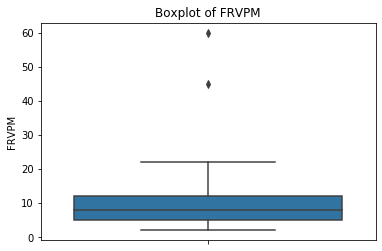

In [93]:
sns.boxplot(y=consumer_survey["FRVPM"])
plt.title("Boxplot of FRVPM")
plt.show()

In [94]:
# Print the larget 3 values in FRVPM
print(consumer_survey["FRVPM"].nlargest(3).values)

[60 45 22]


In [95]:
IQR = five_number_summary["75%"] - five_number_summary["25%"]
upper_limit = (1.5 * IQR) + five_number_summary["75%"]
lower_limit = five_number_summary["25%"] - (1.5 * IQR)
print("IQR:",IQR)
print("1.5 * IQR:", (1.5 * IQR))
print("upper_limit:",upper_limit)# upper whisker is drawn at 22
print("lower_limit:",lower_limit)# lower whisker is drawn at 2

IQR: 7.0
1.5 * IQR: 10.5
upper_limit: 22.5
lower_limit: -5.5


### Histogram

In [96]:
#consumer_survey["FRVPM"].value_counts()

In [97]:
#np.sort(consumer_survey["FRVPM"].value_counts())

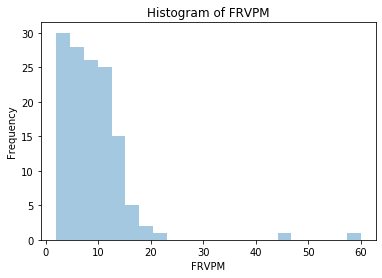

In [98]:
sns.distplot(consumer_survey["FRVPM"], kde = False)
plt.title("Histogram of FRVPM")
plt.xlabel("FRVPM")
plt.ylabel("Frequency")
plt.show()

## AERPM
### Five Number Summary

In [99]:
consumer_survey.AERPM.describe(percentiles=[0.25, 0.75])

count     134.000000
mean     2432.828358
std      1352.863016
min       268.000000
25%      1302.000000
50%      2324.000000
75%      3286.250000
max      6234.000000
Name: AERPM, dtype: float64

### Box Plot

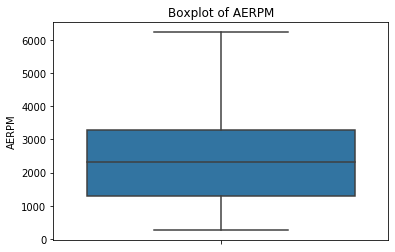

In [100]:
sns.boxplot(y=consumer_survey.AERPM)
plt.title("Boxplot of AERPM")
plt.show()

### Histogram

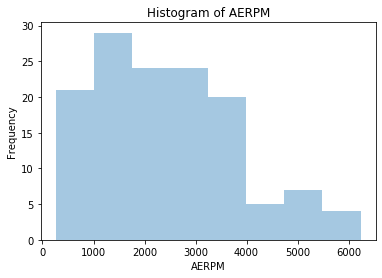

In [101]:
sns.distplot(consumer_survey["AERPM"],hist = True, kde = False)
plt.title("Histogram of AERPM")
plt.xlabel("AERPM")
plt.ylabel("Frequency")
plt.show()

## Exploring Qualitative Attributes
### Cross Tabulation

In [102]:
pd.crosstab(index = consumer_survey["gender"],  columns="count", colnames = ['']) 

,count
gender,
female,61
male,73


In [103]:
pd.crosstab(index = consumer_survey["income"],  columns="count", colnames = ['']) 

,count
income,
high,16
low,36
medium,82


In [104]:
pd.crosstab(index = consumer_survey.FRVPM>10,  columns="count", colnames = ['']) 

,count
FRVPM,
False,90
True,44


In [105]:
pd.crosstab(index = restaurant_details["Region"],  columns="count", colnames = [''])

,count
Region,
East,60
West,50


### Bar Chart

In [106]:
#Convert income to Ordered Categorical data type
consumer_survey['income'] = pd.Categorical(consumer_survey['income'], categories=["low","medium","high"], ordered=True)

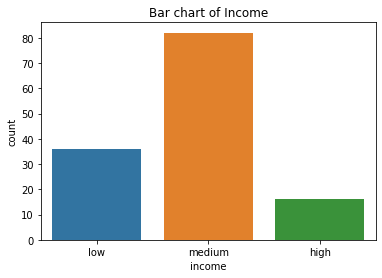

In [107]:
sns.countplot(x='income', data=consumer_survey)
plt.title("Bar chart of Income")
plt.show()

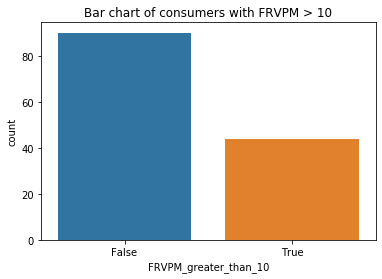

In [108]:
FRVPM_greater_than_10 = pd.DataFrame(consumer_survey.FRVPM>10)
FRVPM_greater_than_10.columns = ['FRVPM_greater_than_10']

sns.countplot(x = 'FRVPM_greater_than_10', data=FRVPM_greater_than_10)
plt.title("Bar chart of consumers with FRVPM > 10")
plt.show()

## Develop insights from data
## Exploring relationship between qualitative and quantitative attributes
## Plot and compare multiple box plots

In [109]:
#Update the AVERAGE_DINE_IN_PER_MONTH column of restaurant details data table with mean_updated
restaurant_details['Average_dine_in_per_month'] = mean_updated['Average_dine_in_per_month']

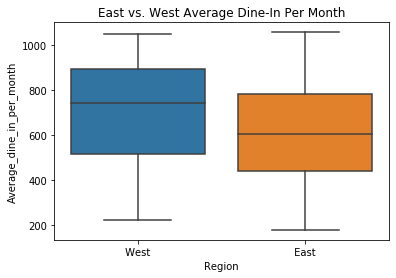

In [110]:
sns.boxplot(y='Average_dine_in_per_month', x = 'Region', data=restaurant_details)
plt.title('East vs. West Average Dine-In Per Month')
plt.show()

## Plot and compare multiple histograms

In [111]:
#Create subsets for East and West regions
subset_East = restaurant_details.loc[(restaurant_details.Region == ' East '), ['Region','Average_dine_in_per_month']]
subset_West = restaurant_details.loc[(restaurant_details.Region == ' West '), ['Region','Average_dine_in_per_month']]

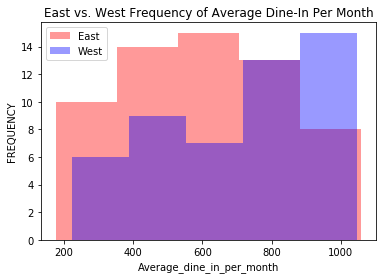

In [112]:
sns.distplot(subset_East['Average_dine_in_per_month'],color="red", kde = False, label = 'East')
sns.distplot(subset_West['Average_dine_in_per_month'],color="blue", kde = False, label = 'West')
plt.legend()
plt.xlabel('Average_dine_in_per_month')
plt.ylabel('FREQUENCY')
plt.title('East vs. West Frequency of Average Dine-In Per Month')
plt.show()

In [113]:
subset_East['Average_dine_in_per_month'].median()

603.0

In [114]:
subset_West['Average_dine_in_per_month'].median()

740.0

## Exploring relationship among qualitative attributes
## Pivot Table

In [115]:
#Varied price restaurants across regions
restaurant_details.pivot_table(index = 'Region', values = 'placeID', columns = 'price', aggfunc = 'count')

price,high,low,medium
Region,,,
East,16,20,24
West,7,15,28


In [116]:
display(consumer_survey.head())

#Create a index column in consumer_survey data
consumer_survey.reset_index(inplace = True)
display(consumer_survey.head())

,gender,smoker,drink_level,dress_preference,ambience,transport,marital_status,interest,personality,religion,activity,income,FRVPM,AERPM
0,male,False,abstemious,informal,family,on foot,single,variety,thrifty-protector,none,student,medium,12,2976
1,female,False,abstemious,informal,family,public,single,technology,hunter-ostentatious,Catholic,student,low,12,3648
2,female,False,social drinker,formal,family,public,single,none,hard-worker,Catholic,student,low,3,1461
3,male,False,abstemious,informal,family,public,single,variety,hard-worker,none,professional,medium,18,4014
4,female,False,abstemious,no preference,family,public,single,none,thrifty-protector,Catholic,student,medium,15,3045


,index,gender,smoker,drink_level,dress_preference,ambience,transport,marital_status,interest,personality,religion,activity,income,FRVPM,AERPM
0,0,male,False,abstemious,informal,family,on foot,single,variety,thrifty-protector,none,student,medium,12,2976
1,1,female,False,abstemious,informal,family,public,single,technology,hunter-ostentatious,Catholic,student,low,12,3648
2,2,female,False,social drinker,formal,family,public,single,none,hard-worker,Catholic,student,low,3,1461
3,3,male,False,abstemious,informal,family,public,single,variety,hard-worker,none,professional,medium,18,4014
4,4,female,False,abstemious,no preference,family,public,single,none,thrifty-protector,Catholic,student,medium,15,3045


In [117]:
#Consumers from various income groups who visit restaurants more than 5 times in a month
consumer_survey.pivot_table(values = 'index', index = ['income'], columns = consumer_survey.FRVPM>5, aggfunc = 'count')

FRVPM,False,True
income,,
low,20.0,16.0
medium,18.0,64.0
high,NaN,16.0


In [118]:
#Gender wise consumers from various income groups who visit restaurants more than 5 times in a month
consumer_survey.pivot_table(values = 'index', index = ['gender', 'income'], columns = consumer_survey.FRVPM>5, aggfunc = 'count')

FRVPM          False  True 
gender income              
female low       8.0    7.0
       medium    8.0   34.0
       high      NaN    4.0
male   low      12.0    9.0
       medium   10.0   30.0
       high      NaN   12.0

# Exploring relationship among quantitative attributes

In [119]:
dining_preferences.head()

,Year,Dine_In,Home_Delivery
0,1990,5649,0
1,1991,5539,0
2,1992,5760,104
3,1993,6509,76
4,1994,6982,156


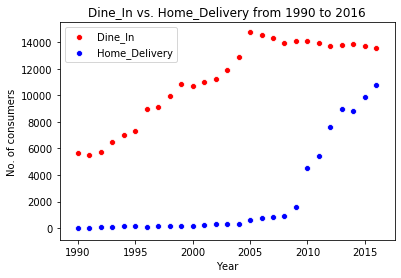

In [120]:
sns.scatterplot(x = 'Year', y = 'Dine_In', data = dining_preferences, color = 'red', label = 'Dine_In')
sns.scatterplot(x = 'Year', y = 'Home_Delivery', data = dining_preferences, color = 'blue', label = 'Home_Delivery')
plt.legend()
plt.xlabel('Year')
plt.ylabel('No. of consumers')
plt.title('Dine_In vs. Home_Delivery from 1990 to 2016')
plt.show()

# Simpson's Paradox

In [121]:
df = pd.DataFrame([["Day1","T1","Bob","Pending"], 
                   ["Day1","T2","John","Pending"],
                   ["Day1","T3","Bob","Resolved"],
                   ["Day1","T4","Bob","Pending"],
                   ["Day1","T5","Bob","Pending"],
                   ["Day2","T1","John","Resolved"],
                   ["Day2","T2","John","Resolved"],
                   ["Day2","T3","Bob","Resolved"],
                   ["Day2","T4","John","Pending"],
                   ["Day2","T5","John","Resolved"]],
                   columns = ['Day', 'TicketNo.','Assignee','Status'])
df

,Day,TicketNo.,Assignee,Status
0,Day1,T1,Bob,Pending
1,Day1,T2,John,Pending
2,Day1,T3,Bob,Resolved
3,Day1,T4,Bob,Pending
4,Day1,T5,Bob,Pending
5,Day2,T1,John,Resolved
6,Day2,T2,John,Resolved
7,Day2,T3,Bob,Resolved
8,Day2,T4,John,Pending
9,Day2,T5,John,Resolved


In [122]:
pd.crosstab(index = df["Assignee"],  columns=df["Status"], colnames = [''])

,Pending,Resolved
Assignee,,
Bob,3,2
John,2,3


In [123]:
pd.crosstab(index = df["Assignee"],  columns=[df["Day"],df["Status"]])

Day         Day1             Day2         
Status   Pending Resolved Pending Resolved
Assignee                                  
Bob            3        1       0        1
John           1        0       1        3

In [124]:
pd.crosstab(index = [df.Day,df.Assignee],  columns=df.Status)

Status         Pending  Resolved
Day  Assignee                   
Day1 Bob             3         1
     John            1         0
Day2 Bob             0         1
     John            1         3